In [1]:
import os
import spikeinterface.full as si
from spikeinterface.curation import get_potential_auto_merge
from P1_SpikeSort.preprocess import preprocess
from P1_SpikeSort.spikesort import make_recording_from_paths_and_get_times
import numpy as np
%matplotlib widget

In [2]:
mouse = 21
day = 16
mouse_day = "M"+str(mouse)+"_D"+str(day)
project_path = "/mnt/datastore/Harry/Cohort11_april2024/"
recording_paths = []
recording_paths.extend([f.path for f in os.scandir(project_path+"vr") if f.is_dir()])
recording_paths.extend([f.path for f in os.scandir(project_path+"of") if f.is_dir()])
recording_paths.extend([f.path for f in os.scandir(project_path+"allen_brain_observatory_visual_coding") if f.is_dir()])
recording_paths = [s for s in recording_paths if mouse_day in s]
ephys_path = project_path + "derivatives/M"+str(mouse)+"/D"+str(day)+"/ephys/"
recording_paths

['/mnt/datastore/Harry/Cohort11_april2024/vr/M21_D16_2024-05-16_14-40-02_VR1',
 '/mnt/datastore/Harry/Cohort11_april2024/of/M21_D16_2024-05-16_15-30-33_OF2',
 '/mnt/datastore/Harry/Cohort11_april2024/of/M21_D16_2024-05-16_14-03-05_OF1']

In [3]:
sorting_analyzer = si.load_sorting_analyzer('/mnt/datastore/Harry/Cohort11_april2024/derivatives/M21/D16/ephys/sorting_analyzer')

In [4]:
recording_mono, rec_samples = make_recording_from_paths_and_get_times(recording_paths)

In [5]:
recording_mono = preprocess(recording_mono)

In [6]:
sorting_analyzer._recording = recording_mono

In [7]:
sorting_analyzer.get_saved_extension_names()

['noise_levels',
 'template_similarity',
 'templates',
 'spike_amplitudes',
 'correlograms',
 'quality_metrics',
 'waveforms',
 'spike_locations',
 'template_metrics',
 'unit_locations',
 'random_spikes']

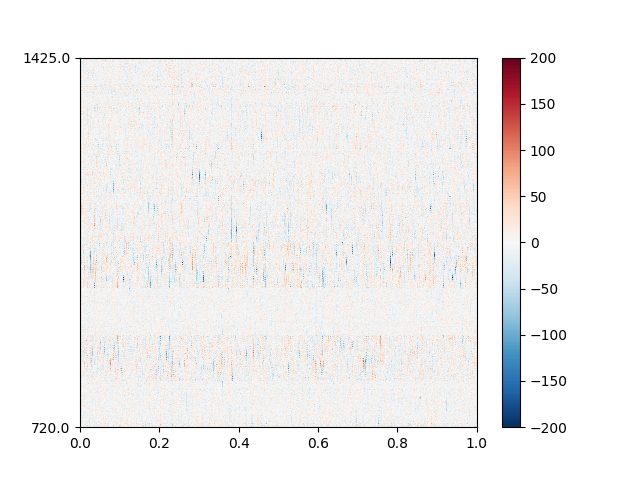

In [17]:
si.plot_traces(recording=recording_mono, backend="matplotlib")


In [11]:
si.plot_traces(recording=recording_mono, mode="line", backend="ipywidgets")


AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [ ]:
si.plot_traces(recording=recording_mono, backend="ephyviewer", mode="line", show_channel_ids=True)


In [ ]:
si.plot_sorting_summary(sorting_analyzer=sorting_analyzer, curation=True, backend="sortingview")


In [8]:
si.plot_unit_waveforms(sorting_analyzer, backend="ipywidgets")

AppLayout(children=(HBox(children=(Checkbox(value=False, description='same axis'), Checkbox(value=True, descri…